In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut


In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load dataset

Load dataset yang ingin dipre-process dengan menggunakan `pd.read_csv()`.

In [4]:
misteri=pd.read_csv('misteri.csv')

Pastikan isi dataset dengan menggunakan `df.info()` dan `df.describe()`. Pisahkan kolom menjadi numerik dan kategorikal apabila diperlukan.

In [5]:
# CODE HERE asumsi C,E,F adalah kategorical
numericals=['A','B','D']
categoricals=['C','E','F']
print(misteri[numericals].info())
print(misteri[categoricals].info())
print(misteri[numericals].describe())
print(misteri[categoricals].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13592 entries, 0 to 13591
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       13418 non-null  float64
 1   B       13415 non-null  float64
 2   D       13405 non-null  float64
dtypes: float64(3)
memory usage: 318.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13592 entries, 0 to 13591
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       13417 non-null  float64
 1   E       13406 non-null  float64
 2   F       13429 non-null  float64
dtypes: float64(3)
memory usage: 318.7 KB
None
                  A             B             D
count  13418.000000  1.341500e+04  1.340500e+04
mean      50.604303  1.646446e+07  3.522170e+07
std        7.185786  3.385392e+06  2.118154e+07
min       22.000000  7.540000e+06  1.000000e+06
25%       45.710112  1.405912e+07  2.049483e+07
50%       50.513100  1.612895e+0

In [6]:
# CODE HERE
for ii in misteri[categoricals]:
    mm=ii
    print('value count categoricals:','\n',misteri[mm].value_counts())
     


value count categoricals: 
 0.0     3347
1.0     3279
2.0     1992
3.0     1333
5.0      723
4.0      667
6.0      626
7.0      577
8.0      475
12.0     264
13.0     134
Name: C, dtype: int64
value count categoricals: 
 0.0    11374
1.0     2032
Name: E, dtype: int64
value count categoricals: 
 0.0    12880
1.0      549
Name: F, dtype: int64


In [7]:
for ii in misteri[categoricals]:
    mm=ii
    print('values categoricals',mm,'unique :\n',misteri[mm].unique())

values categoricals C unique :
 [ 7.  0.  1. nan  4.  3.  2. 12.  8.  6.  5. 13.]
values categoricals E unique :
 [ 0.  1. nan]
values categoricals F unique :
 [ 0. nan  1.]


In [8]:
#buat df baru untuk diproses
misteriprocessed=misteri

## Missing Data

Pertama, kita akan menangani data-data yang hilang. Cek jumlah data yang hilang dengan menggunakan `df.isna().sum()`.

In [9]:
## CODE HERE
misteriprocessed.isna().sum()

A    174
B    177
C    175
D    187
E    186
F    163
dtype: int64

Kolom apa saja yang memiliki data hilang/tidak lengkap? Ada berapa kolom? 

Semua Kolom ada, ada 6 kolom

### Drop

Apakah kita ingin menangani data dengan cara menghapus mereka? Kalau ya, hapus baris-baris dengan menggunakan `df.dropna()`.

In [10]:
#data yang murni belum diproses
# CODE HERE
# CODE HERE
print('numericals\n',misteri[numericals].describe(),'\n')

for ii in misteri[categoricals]:
    mm=ii
    print('value count categoricals:','\n',misteri[mm].value_counts())

numericals
                   A             B             D
count  13418.000000  1.341500e+04  1.340500e+04
mean      50.604303  1.646446e+07  3.522170e+07
std        7.185786  3.385392e+06  2.118154e+07
min       22.000000  7.540000e+06  1.000000e+06
25%       45.710112  1.405912e+07  2.049483e+07
50%       50.513100  1.612895e+07  3.031256e+07
75%       55.457167  1.854458e+07  4.465140e+07
max       80.000000  3.400000e+07  2.340000e+08 

value count categoricals: 
 0.0     3347
1.0     3279
2.0     1992
3.0     1333
5.0      723
4.0      667
6.0      626
7.0      577
8.0      475
12.0     264
13.0     134
Name: C, dtype: int64
value count categoricals: 
 0.0    11374
1.0     2032
Name: E, dtype: int64
value count categoricals: 
 0.0    12880
1.0      549
Name: F, dtype: int64


In [11]:
#data yang diproses drop
misteriprocessed.dropna(inplace=True)
print('cek apakah masih ada data null:\n',misteriprocessed.isna().sum())
## CODE HERE
# CODE HERE
print('numericals processed:\n',misteriprocessed[numericals].describe(),'\n')
for iiproc in misteriprocessed[categoricals]:
    mmproc=iiproc
    print('value count categoricals processed:','\n',misteriprocessed[iiproc].value_counts())

cek apakah masih ada data null:
 A    0
B    0
C    0
D    0
E    0
F    0
dtype: int64
numericals processed:
                   A             B             D
count  12556.000000  1.255600e+04  1.255600e+04
mean      50.600674  1.646976e+07  3.529423e+07
std        7.196599  3.380724e+06  2.124292e+07
min       22.000000  7.589834e+06  1.000000e+06
25%       45.712914  1.406304e+07  2.052298e+07
50%       50.510101  1.613403e+07  3.032505e+07
75%       55.449003  1.854862e+07  4.465770e+07
max       80.000000  3.400000e+07  2.340000e+08 

value count categoricals processed: 
 0.0     3111
1.0     3087
2.0     1865
3.0     1242
5.0      675
4.0      632
6.0      591
7.0      537
8.0      442
12.0     245
13.0     129
Name: C, dtype: int64
value count categoricals processed: 
 0.0    10674
1.0     1882
Name: E, dtype: int64
value count categoricals processed: 
 0.0    12046
1.0      510
Name: F, dtype: int64


Kenapa akhirnya kita putuskan untuk menghapus data yang hilang saja?

Karena data yang hilang bila dihapus tidak mengurangi orde data keseluruhan

### Imputasi Numeric

Apakah kita ingin menangani data hilang di kolom tertentu dengan imputasi? Kalau ya, lakukan imputasi dengan menggunakan `df.fillna()`

In [12]:
## CODE HERE

Kenapa akhirnya kita putuskan untuk melakukan imputasi pada kolom-kolom tersebut? Nilai apa yang digunakan untuk imputasi dan mengapa?

### Imputasi Categorical

Apakah kita ingin menangani data hilang di kolom tertentu dengan imputasi? Kalau ya, lakukan imputasi dengan menggunakan `df.fillna()`

In [13]:
## CODE HERE

Kenapa akhirnya kita putuskan untuk melakukan imputasi pada kolom-kolom tersebut? Nilai apa yang digunakan untuk imputasi dan mengapa?

Cek sekali lagi apakah semua nilai hilang sudah ditangani.

In [14]:
## CODE HERE

## Duplicated Data

Selanjutnya, kita akan menangani data duplikat. Gunakan `df.duplicated.sum()` untuk mengecek jumlah kolom hilang. Kemudian gunakan `df.drop_duplicates()` untuk menghapus baris-baris duplikat.

In [15]:
## CODE HERE
mf=misteriprocessed.drop_duplicates(keep='first')
print('Duplicates:\n',mf.duplicated().sum())
print('numericals values remain after del:\n',mf[numericals].describe(),'\n')
for iimf in mf[categoricals]:
    print('categoricals value count remain after del:','\n',mf[iimf].value_counts())

Duplicates:
 0
numericals values remain after del:
                   A             B             D
count  11793.000000  1.179300e+04  1.179300e+04
mean      50.589678  1.646332e+07  3.519454e+07
std        7.186256  3.379097e+06  2.112915e+07
min       22.000000  7.589834e+06  1.000000e+06
25%       45.689652  1.404653e+07  2.049156e+07
50%       50.499226  1.612824e+07  3.028422e+07
75%       55.439425  1.854427e+07  4.465140e+07
max       80.000000  3.400000e+07  2.340000e+08 

categoricals value count remain after del: 
 0.0     2917
1.0     2901
2.0     1748
3.0     1171
5.0      639
4.0      592
6.0      567
7.0      499
8.0      410
12.0     230
13.0     119
Name: C, dtype: int64
categoricals value count remain after del: 
 0.0    10024
1.0     1769
Name: E, dtype: int64
categoricals value count remain after del: 
 0.0    11314
1.0      479
Name: F, dtype: int64


Apakah akhirnya semua data duplikat dihapus? Mengapa?

* Tidak semua, karena untuk menjaga data original yang masih ada. (Sisakan 1)

## Outliers

Setelah data yang hilang dan duplikat, kita akan menangani outlier. Ada 2 cara untuk melakukan ini:
* Dengan Z-score
* Dengan IQR

### Menggunakan Z-score

Apakah kita memutuskan untuk menangani outlier dengan Z-score? Mengapa?

* TIDAK. Karena Fitur B terdistribusi Right Skewed

In [16]:
from scipy import stats



### Menggunakan IQR

Apakah kita memutuskan untuk menangani outlier dengan IQR? Mengapa?

* Kita memutuskan menangani Outlier dengan IQR karena fitur B right skewed. Fokus ke pasangan yang  korelasinya lebih tinggi (A-B) dan (B-F). Pemilihan B-F karena pasangan merupakan fitur yang berkorelasi kuat dan diasumsikan F merupakan target.Maka dari itu perlu membersihkan Fitur B terlebih dahulu.

In [17]:
from scipy import stats

Q1=mf['B'].quantile(0.25)
Q3=mf['B'].quantile(0.75)
IQR=Q3-Q1
low_limit=Q1-(1.5*IQR)
high_limit=Q1+(1.5*IQR)
filtered_entries=((mf['B']<low_limit)|(mf['B']<high_limit))
mfo=mf[filtered_entries]

print(f'Jumlah baris sebelum memfilter outlier: {len(mf)}')

## CODE HERE

print(f'Jumlah baris setelah memfilter outlier: {len(mfo)}')

Jumlah baris sebelum memfilter outlier: 11793
Jumlah baris setelah memfilter outlier: 10513


In [18]:
print('Duplicates:\n',mfo.duplicated().sum())
print('numericals values remain after del:\n',mfo[numericals].describe(),'\n')
for iimfo in mfo[categoricals]:
    print('categoricals value count remain after del:','\n',mfo[iimfo].value_counts())

Duplicates:
 0
numericals values remain after del:
                   A             B             D
count  10513.000000  1.051300e+04  1.051300e+04
mean      49.833691  1.568035e+07  3.529156e+07
std        6.896806  2.589219e+06  2.118439e+07
min       22.000000  7.589834e+06  1.000000e+06
25%       45.183988  1.378918e+07  2.051379e+07
50%       49.827707  1.568799e+07  3.036936e+07
75%       54.545474  1.765072e+07  4.479911e+07
max       75.889689  2.078822e+07  2.340000e+08 

categoricals value count remain after del: 
 0.0     2601
1.0     2587
2.0     1536
3.0     1055
5.0      564
4.0      533
6.0      504
7.0      450
8.0      367
12.0     204
13.0     112
Name: C, dtype: int64
categoricals value count remain after del: 
 0.0    8947
1.0    1566
Name: E, dtype: int64
categoricals value count remain after del: 
 0.0    10487
1.0       26
Name: F, dtype: int64


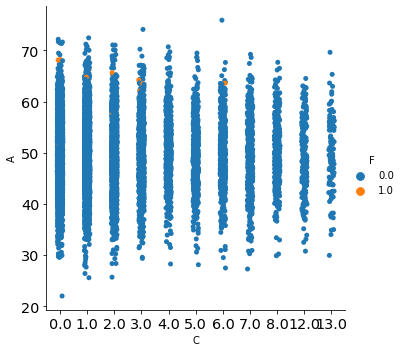

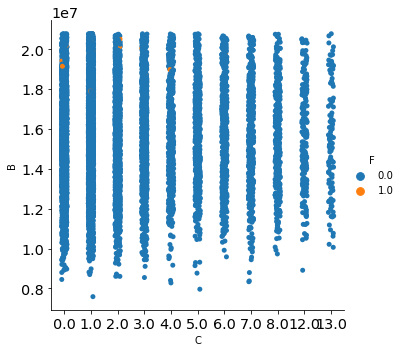

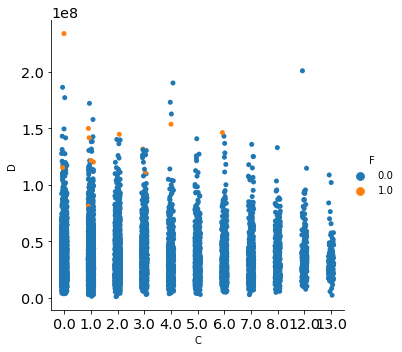

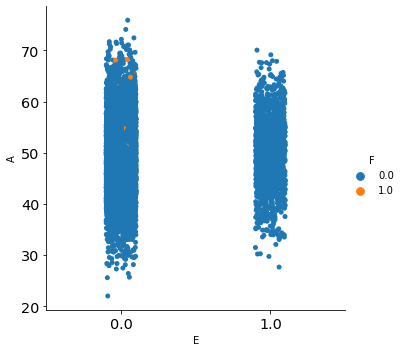

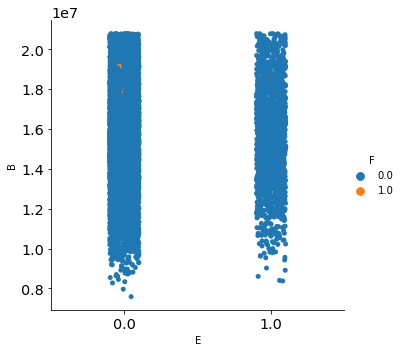

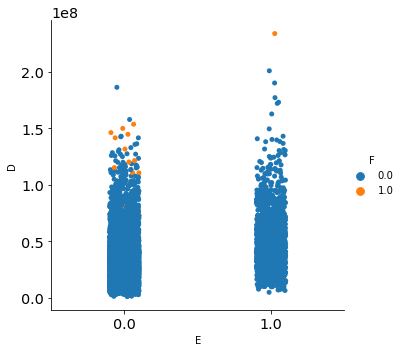

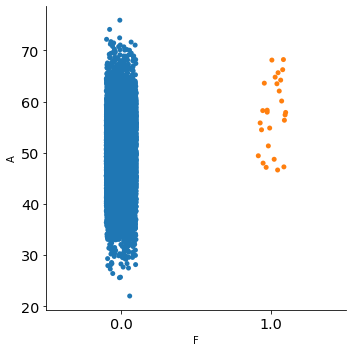

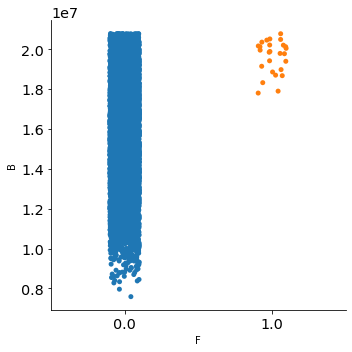

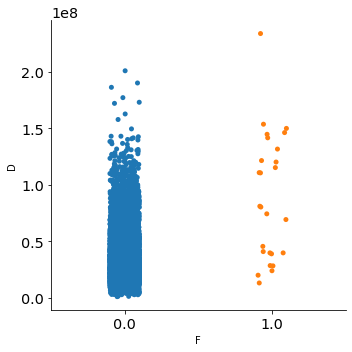

In [19]:
for jj in categoricals:
    for kk in numericals: 
        sns.catplot(data=mfo,x=jj,y=kk, hue='F');

### Normalization/Standardization

Apakah kita perlu melakukan normalization/standardization?

In [20]:
mfo.describe()

,A,B,C,D,E,F
count,10513.000000,1.051300e+04,10513.000000,1.051300e+04,10513.000000,10513.000000
mean,49.833691,1.568035e+07,2.548274,3.529156e+07,0.148958,0.002473
std,6.896806,2.589219e+06,2.836416,2.118439e+07,0.356064,0.049671
min,22.000000,7.589834e+06,0.000000,1.000000e+06,0.000000,0.000000
25%,45.183988,1.378918e+07,1.000000,2.051379e+07,0.000000,0.000000
50%,49.827707,1.568799e+07,2.000000,3.036936e+07,0.000000,0.000000
75%,54.545474,1.765072e+07,4.000000,4.479911e+07,0.000000,0.000000
max,75.889689,2.078822e+07,13.000000,2.340000e+08,1.000000,1.000000


In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
## CODE HERE
mfo['a_norm']= MinMaxScaler().fit_transform(mfo['A'].values.reshape(len(mfo),1))
mfo['b_norm']= MinMaxScaler().fit_transform(mfo['B'].values.reshape(len(mfo),1))
mfo['d_norm']= MinMaxScaler().fit_transform(mfo['D'].values.reshape(len(mfo),1))

<ipython-input-21-a9f138dbe437>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfo['a_norm']= MinMaxScaler().fit_transform(mfo['A'].values.reshape(len(mfo),1))
<ipython-input-21-a9f138dbe437>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfo['b_norm']= MinMaxScaler().fit_transform(mfo['B'].values.reshape(len(mfo),1))
<ipython-input-21-a9f138dbe437>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

* Setelah coba install imblearn memakai conda, 

Apakah kita melakukan normalization/standardization? 

Cek apakah nilai tertransformasi dengan benar dengan menggunakan `df.describe()`

* Telah dilakukan normalization

In [22]:
## CODE HERE
mfo.describe()

,A,B,C,D,E,F,a_norm,b_norm,d_norm
count,10513.000000,1.051300e+04,10513.000000,1.051300e+04,10513.000000,10513.000000,10513.000000,10513.000000,10513.000000
mean,49.833691,1.568035e+07,2.548274,3.529156e+07,0.148958,0.002473,0.516494,0.612992,0.147174
std,6.896806,2.589219e+06,2.836416,2.118439e+07,0.356064,0.049671,0.127980,0.196177,0.090920
min,22.000000,7.589834e+06,0.000000,1.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.183988,1.378918e+07,1.000000,2.051379e+07,0.000000,0.000000,0.430212,0.469705,0.083750
50%,49.827707,1.568799e+07,2.000000,3.036936e+07,0.000000,0.000000,0.516383,0.613571,0.126049
75%,54.545474,1.765072e+07,4.000000,4.479911e+07,0.000000,0.000000,0.603928,0.762281,0.187979
max,75.889689,2.078822e+07,13.000000,2.340000e+08,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Encoding

Apakah kita perlu melakukan feature encoding?

* Tidak, sementara ini fitur semua berbentuk numerik

In [23]:
for cat in cats:
    # CODE HERE

SyntaxError: unexpected EOF while parsing (<ipython-input-23-37c68d4e7393>, line 2)

Mengapa kita memerlukan feature encoding? Jenis feature encoding apa yang kita akhirnya gunakan dan mengapa?

Jangan lupa gabungkan encoded feature dengan dataframe awal dan cek apakah sudah tergabung dengan baik dengan menggunakan `df.columns`

* kita memerlukan featur encoding untuk menyesuaikan dengan plug in machine learning yang hanya dapat menerima input berupa numerik, bukan kategori

* kita memerlukan featur encoding untuk menyesuaikan dengan plug in machine learning yang hanya dapat menerima input berupa numerik, bukan kategori

## Imbalanced Dataset

Apakah target kita imbalanced? Cek dengan menggunakan `value_counts()`. Apakah kita perlu melakukan Over/Undersampling?

Kalau ya, persiapkan data kitauntuk over/undersampling dengan memisahkan mereka ke variabel `X` dan `y`.

* Ya, Imbalanced. Kita perlu melakukan oversampling untuk fitur F

In [24]:
mfo['F_class']=mfo['F']==1
print(mfo['F_class'].value_counts())

False    10487
True        26
Name: F_class, dtype: int64


<ipython-input-24-ee8412adb202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mfo['F_class']=mfo['F']==1


In [36]:
## CODE HERE
X= mfo[[col for col in mfo.columns if col not in ['F_class','F']]].values
y= mfo['F_class']

print(X.shape)
print(y.shape)

(10513, 8)
(10513,)


Lakukan over/under sampling dengan menggunakan Sampler dari `imblearn`.

In [37]:
from imblearn import over_sampling, under_sampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X,y)
## CODE HERE

Jangan lupa cek distribusi kelas/label setelah sampling dengan menggunakan `value_counts()`.

In [39]:
## CODE HERE
print(pd.Series(y).value_counts())
print(pd.Series(y_over).value_counts())

False    10487
True        26
Name: F_class, dtype: int64
True     10487
False    10487
Name: F_class, dtype: int64


* Lainkali, bisa dicoba mengisi data null saja dengan fillna(), diisi dengan data median atau mean
* Jika delete data null, jumlah data di kelas F=1 berkurang sangat drastis, lebih baik coba Fillna